# Python Opportunistic Network Simulator

In [28]:
import random
import math
import time
import simpy
import json
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pons
import pons.routing as pr

## Set Experiment Parameters

In [29]:
SIM_TIME = 3600
NET_RANGE = 100
NUM_NODES = 10
WORLD_SIZE = (1000, 1000)
RUNS = 10
MSG_GEN_INTERVAL = (20, 40)
MSG_SIZE = (150, 512)

ROUTERS=[pr.EpidemicRouter(), pr.SprayAndWaitRouter(copies=7), pr.SprayAndWaitRouter(copies=7, binary=True), pr.DirectDeliveryRouter(), pr.FirstContactRouter(), pr.PRoPHETRouter()]

## Run Experiments

In [30]:

net_stats = []
routing_stats = []
for router in ROUTERS:
    print("router: %s" % router)
    for run in range(RUNS):
        random.seed(run)
        print("run", run+1)

        moves = pons.generate_randomwaypoint_movement(SIM_TIME, NUM_NODES, WORLD_SIZE[0], WORLD_SIZE[1], min_speed=1.0, max_speed=3.0, max_pause=120.0)
        net = pons.NetworkSettings("WIFI", range=NET_RANGE)

        nodes = pons.generate_nodes(NUM_NODES, net=[net], router=copy.deepcopy(router))
        config = {"movement_logger": False, "peers_logger": False}

        msggenconfig = {"interval": MSG_GEN_INTERVAL, "src": (0, NUM_NODES), "dst": (0, NUM_NODES), "size": MSG_SIZE, "id": "M"}

        netsim = pons.NetSim(SIM_TIME, WORLD_SIZE, nodes, moves, config=config, msggens=[msggenconfig])

        netsim.setup()
        
        netsim.run()

        ns = copy.deepcopy(netsim.net_stats)
        ns['router'] = "" + str(router)
        net_stats.append(ns)
        rs = copy.deepcopy(netsim.routing_stats)
        rs['router'] = "" + str(router)
        routing_stats.append(rs)

# convert list of dictionaries to dataframe
df_net=pd.DataFrame.from_dict(net_stats, orient='columns')
df_routing=pd.DataFrame.from_dict(routing_stats, orient='columns')

router: EpidemicRouter
run 1
initialize simulation
-> start movement manager
run simulation
start message generator

simulation finished
simulated 3601 seconds in 0.55 seconds (6512.20 x real time)
real: 0.552962, sim: 3601 rate: 6512.20 steps/s
run 2
initialize simulation
-> start movement manager
run simulation
start message generator

simulation finished
simulated 3601 seconds in 0.37 seconds (9789.96 x real time)
real: 0.367826, sim: 3601 rate: 9789.96 steps/s
run 3
initialize simulation
-> start movement manager
run simulation
start message generator

simulation finished
simulated 3601 seconds in 0.51 seconds (7109.72 x real time)
real: 0.506490, sim: 3601 rate: 7109.72 steps/s
run 4
initialize simulation
-> start movement manager
run simulation
start message generator

simulation finished
simulated 3601 seconds in 0.43 seconds (8362.46 x real time)
real: 0.430615, sim: 3601 rate: 8362.46 steps/s
run 5
initialize simulation
-> start movement manager
run simulation
start message ge

In [31]:
df_net

,tx,rx,drop,loss,router
0,11533,11533,0,0,EpidemicRouter
1,8148,8148,0,0,EpidemicRouter
2,12917,12917,0,0,EpidemicRouter
3,10022,10022,0,0,EpidemicRouter
4,10620,10620,0,0,EpidemicRouter
5,10031,10031,0,0,EpidemicRouter
6,11453,11453,0,0,EpidemicRouter
7,12785,12785,0,0,EpidemicRouter
8,11810,11810,0,0,EpidemicRouter
9,7616,7616,0,0,EpidemicRouter


In [32]:
df_routing

,created,delivered,dropped,started,relayed,removed,aborted,dups,latency_avg,delivery_prob,hops_avg,overhead_ratio,router
0,122,95,0,4227,4227,0,0,3283,464.873684,0.778689,2.084211,43.494737,EpidemicRouter
1,121,80,0,3207,3206,0,0,2371,400.950000,0.661157,2.000000,39.075000,EpidemicRouter
2,120,102,0,4229,4229,0,0,3265,405.529412,0.850000,2.450980,40.460784,EpidemicRouter
3,117,99,0,3946,3946,0,0,3010,499.141414,0.846154,2.272727,38.858586,EpidemicRouter
4,117,106,0,4158,4158,0,0,3189,520.047170,0.905983,2.301887,38.226415,EpidemicRouter
5,120,98,0,3581,3581,0,0,2668,496.510204,0.816667,2.112245,35.540816,EpidemicRouter
6,116,92,0,3926,3925,0,0,3049,465.510870,0.793103,2.239130,41.663043,EpidemicRouter
7,120,103,0,5131,5129,0,0,4114,499.572816,0.858333,2.339806,48.796117,EpidemicRouter
8,123,101,0,4239,4236,0,0,3270,380.475248,0.821138,2.316832,40.940594,EpidemicRouter
9,119,81,0,2712,2712,0,0,1858,607.074074,0.680672,1.962963,32.481481,EpidemicRouter


## Analyze the Results

In [33]:
sns.set()

In [34]:
def plot_violin_boxplot(df, x, y, title, xlabel, ylabel, palette="turbo", ylim=None, ax=None):
    ax = sns.violinplot(x=x, y=y, data=df, saturation=0.5, inner=None, linewidth=0, palette=palette, ax=ax)
    ax = sns.boxplot(x=x, y=y, data=df, boxprops={'zorder': 2}, ax=ax, saturation=0.8, palette=palette)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.xticks(rotation=10)
    if ylim is not None:
        ax.set_ylim(ylim)
    ax.legend([],[], frameon=False)
    for patch in ax.patches:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .3))
    return ax

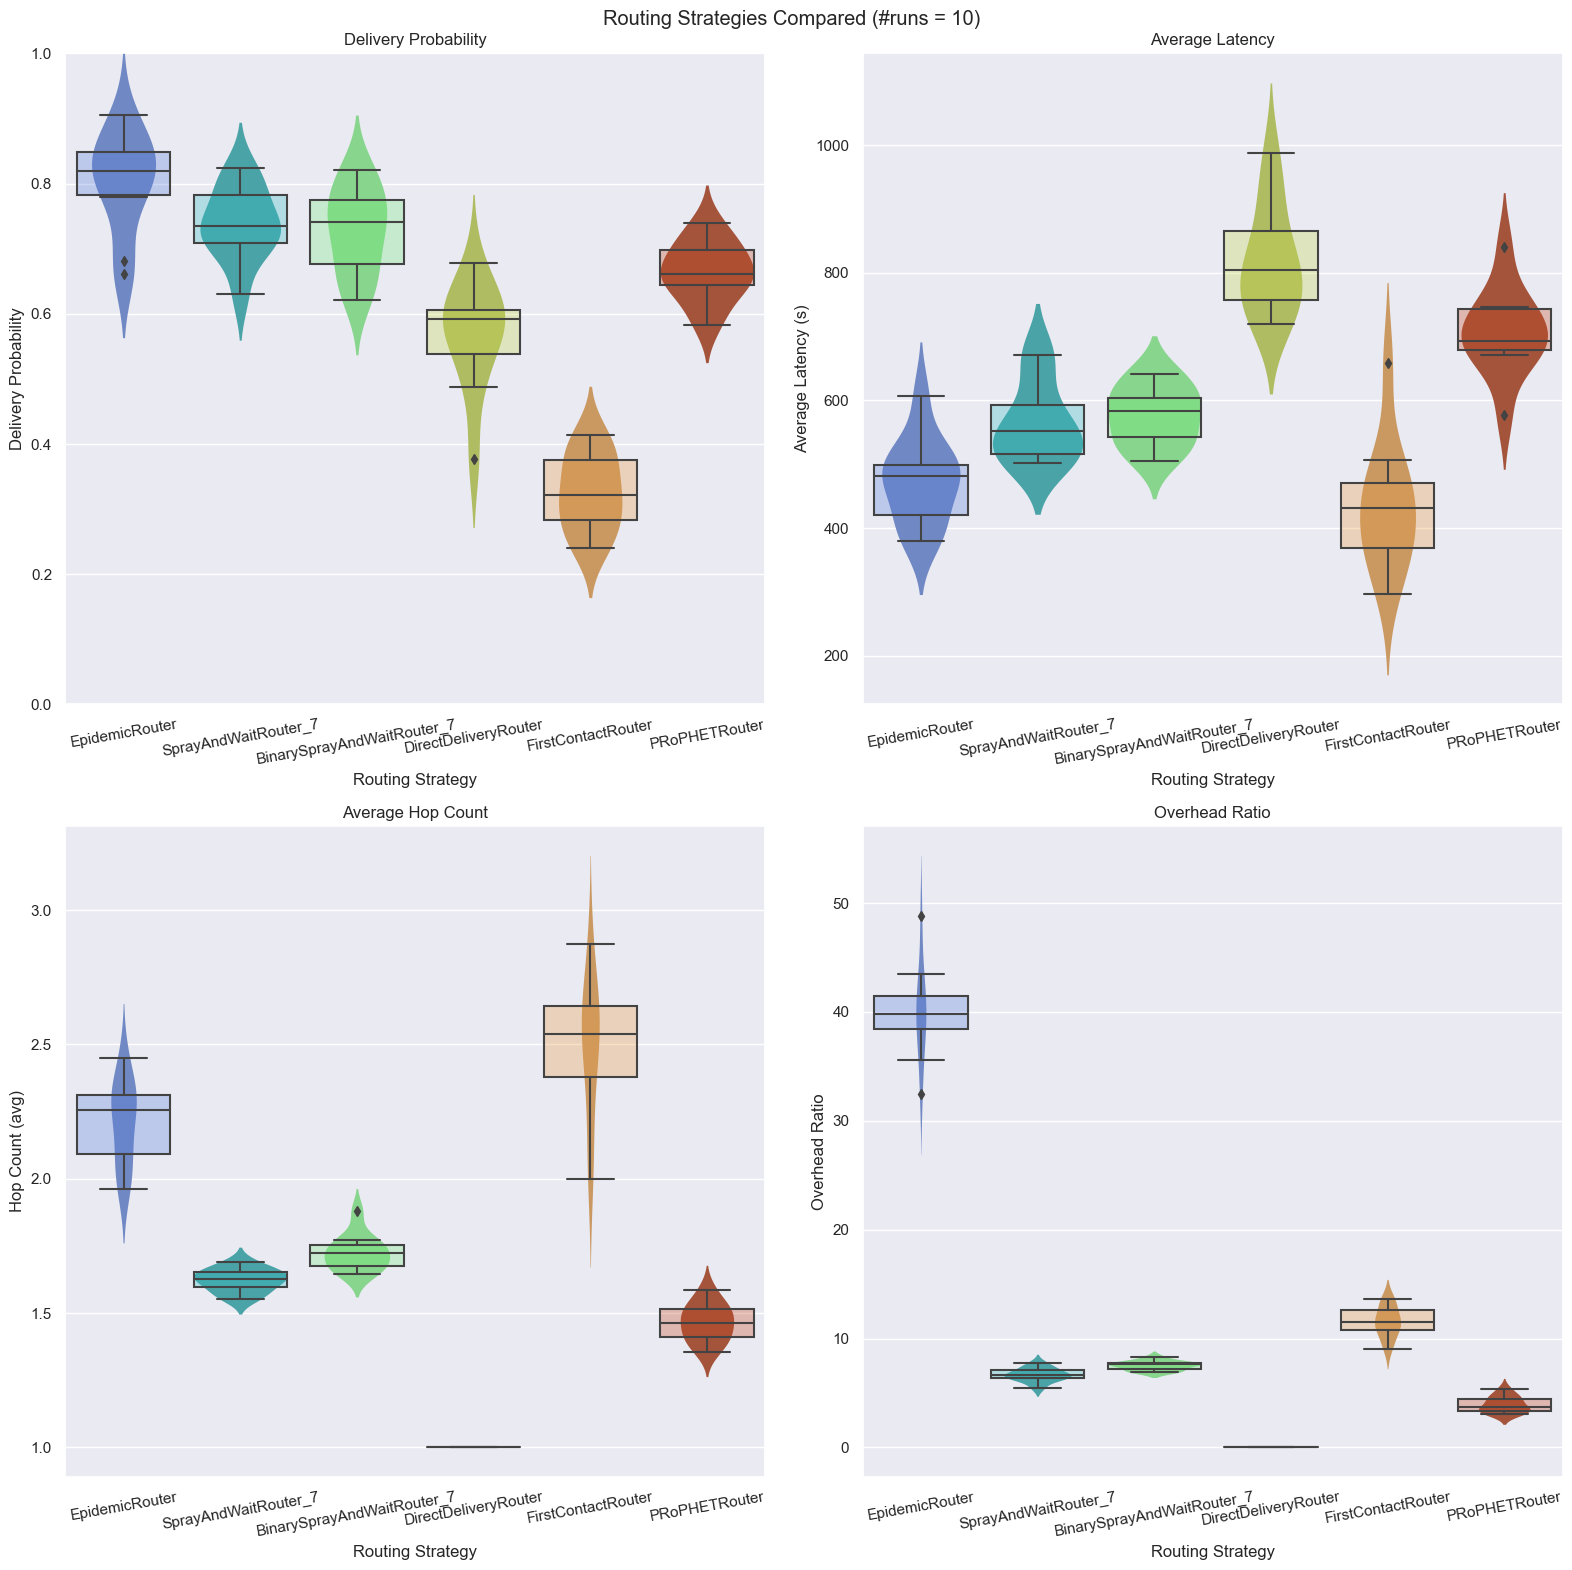

In [35]:
f = plt.figure(figsize=(16, 16))
f.suptitle("Routing Strategies Compared (#runs = %d)" % RUNS)
gs = f.add_gridspec(2, 2)
ax1 = f.add_subplot(gs[0, 0])
plot_violin_boxplot(df_routing, "router", "delivery_prob", "Delivery Probability", "Routing Strategy", "Delivery Probability", palette="turbo", ylim=(0,1), ax=ax1)
ax2 = f.add_subplot(gs[0, 1])
plot_violin_boxplot(df_routing, "router", "latency_avg", "Average Latency", "Routing Strategy", "Average Latency (s)", palette="turbo", ax=ax2)
ax3 = f.add_subplot(gs[1, 0])
plot_violin_boxplot(df_routing, "router", "hops_avg", "Average Hop Count", "Routing Strategy", "Hop Count (avg)", palette="turbo", ax=ax3)
ax4 = f.add_subplot(gs[1, 1])
plot_violin_boxplot(df_routing, "router", "overhead_ratio", "Overhead Ratio", "Routing Strategy", "Overhead Ratio", palette="turbo", ax=ax4)

f.tight_layout()
plt.show()

<Axes: xlabel='delivery_prob', ylabel='Proportion'>

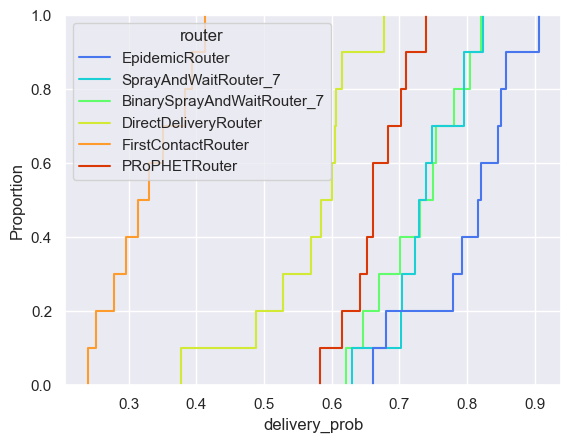

In [36]:
sns.ecdfplot(data=df_routing, x="delivery_prob", hue="router", palette="turbo")

<Axes: xlabel='delivery_prob', ylabel='overhead_ratio'>

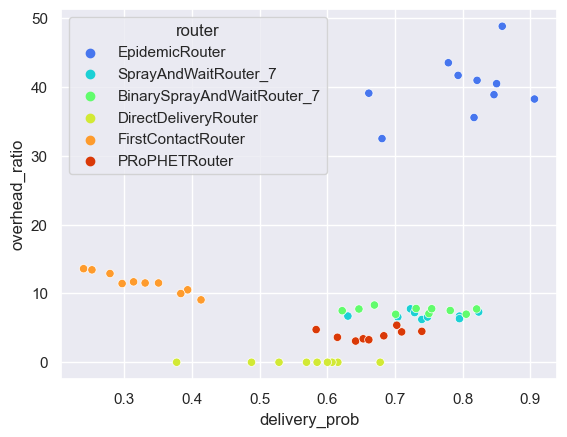

In [37]:
sns.scatterplot(data=df_routing, x="delivery_prob", y="overhead_ratio", hue="router", palette="turbo")

<Axes: xlabel='delivery_prob', ylabel='latency_avg'>

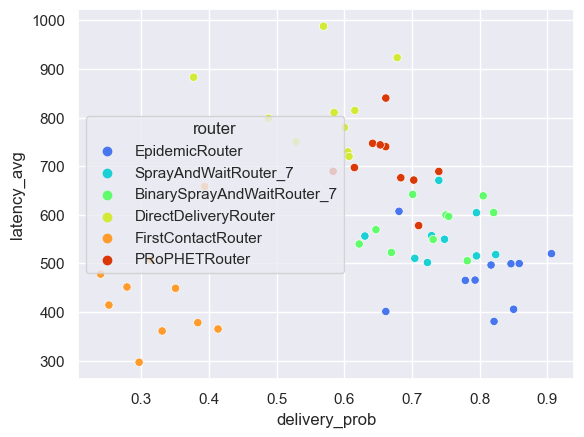

In [38]:
sns.scatterplot(data=df_routing, y="latency_avg", x="delivery_prob", hue="router", palette="turbo")

<Axes: xlabel='x', ylabel='y'>

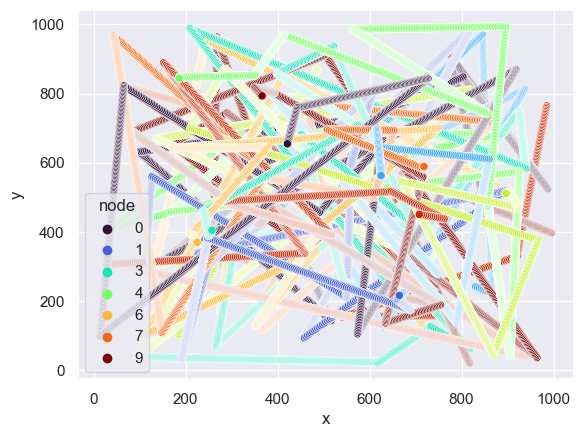

In [39]:
run=0
random.seed(run)
moves = pons.generate_randomwaypoint_movement(SIM_TIME, NUM_NODES, WORLD_SIZE[0], WORLD_SIZE[1], max_pause=60.0)

df = pd.DataFrame(moves, columns=["time", "node", "x", "y"])

sns.scatterplot(data=df, x="x", y="y", hue="node", palette="turbo")

<Axes: xlabel='x', ylabel='y'>

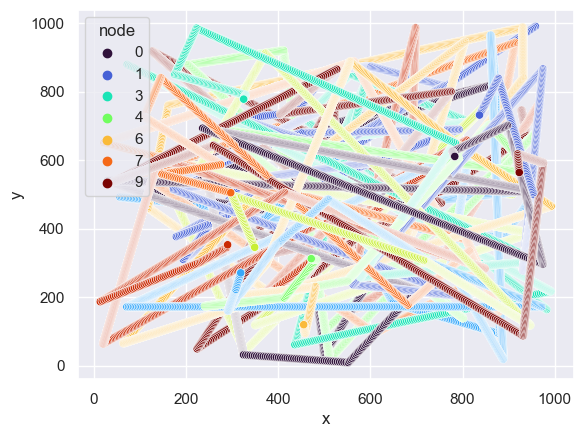

In [40]:
run=1
random.seed(run)
moves = pons.generate_randomwaypoint_movement(SIM_TIME, NUM_NODES, WORLD_SIZE[0], WORLD_SIZE[1], max_pause=60.0)

df = pd.DataFrame(moves, columns=["time", "node", "x", "y"])

sns.scatterplot(data=df, x="x", y="y", hue="node", palette="turbo")

<Axes: xlabel='x', ylabel='y'>

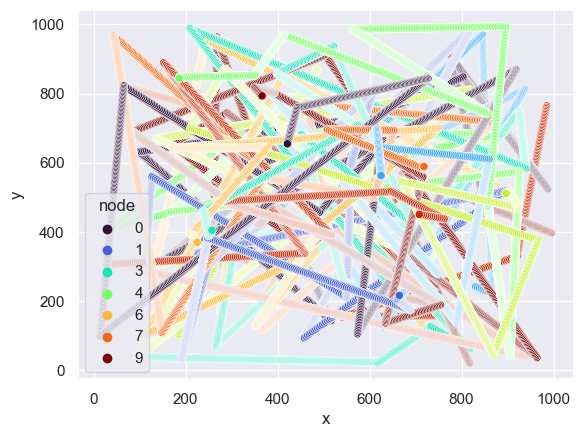

In [41]:
run=0
random.seed(run)
moves = pons.generate_randomwaypoint_movement(SIM_TIME, NUM_NODES, WORLD_SIZE[0], WORLD_SIZE[1], max_pause=60.0)

df = pd.DataFrame(moves, columns=["time", "node", "x", "y"])

sns.scatterplot(data=df, x="x", y="y", hue="node", palette="turbo")